**Air Quality Analysis of some major cities in India and her neighbourhood**

**Objective**

###### Pollution is a global menace, which must be controlled, if not eradicated urgently. Air polluton is the most hazardous of all the pollutions as it is almost impossible to avoid it without relocating.In this project, my main objective is to study the air quality data of Indian cities(globally ranked among the worst polluted cities) and some major cities in the neighbourhood available to us and to extract as much information possible from the data sets. It will be interesting to see how Indian cities fair against other cities in the neighbourhood.


###### Types of pollutants in the air

###### In general the following particles contribute to the air pollution:

##### About the data

###### The data is sourced from the following websites:
https://www.kaggle.com/rohanrao/air-quality-data-in-india


https://aqicn.org/data-platform/covid19/ 

In [12]:
##Importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


###### The file India_city_day.csv is of size 2.4MB and the data looks like the following:

In [13]:
city_df=pd.read_csv('India_city_day.csv')
print(city_df.shape)
print(city_df.head(5))

(29552, 16)
        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  1/01/2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2/01/2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  3/01/2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  4/01/2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  5/01/2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


### Data Cleaning

##### Check for all blank rows and drop them from the data frame

In [14]:
#Drop rows if any of the values in the following subset is 0
city_df.dropna(subset = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'])


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2122,Amaravati,24/11/2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
2123,Amaravati,25/11/2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,26/11/2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,27/11/2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,28/11/2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29547,Ahmedabad,8/08/2020,105.00,37.00,6.25,10.01,16.29,12.87,0.30,4.32,15.52,1.82,10.25,0.18,45.0,Moderate
29548,Ahmedabad,9/08/2020,145.00,24.00,6.25,10.01,16.29,12.87,0.30,4.32,15.52,1.82,10.25,0.18,45.0,Moderate
29549,Ahmedabad,10/08/2020,89.00,23.00,6.25,10.01,16.29,12.87,0.30,4.32,15.52,1.82,10.25,0.18,45.0,Moderate
29550,Ahmedabad,11/08/2020,245.00,24.00,6.25,10.01,16.29,12.87,0.30,4.32,15.52,1.82,10.25,0.18,45.0,Severe


###### As can be seen above many cells have NaN or blank values. We are going to replace those with 0. 

In [15]:
city_df=city_df.fillna(0)
#print(city_df.iloc[:,2:14])
#print(city_df.head(5))

### Q1. How many distinct cities are there in the dataset?

In [16]:
series_city=city_df['City']
cities=series_city.unique()
print(cities)

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


### Q2. List the days in air quality buckets by city by year

In [17]:
#Extract the year & month number from Date 
city_df['Date'] = city_df['Date'].astype(str)
city_df['Year']= city_df['Date'].str[-4:]
city_df['Month']= city_df['Date'].str[-7:-5]


city_by_aq=city_df.groupby(['City','Year','AQI_Bucket'])['Date'].count()

#city_by_aq[city_by_aq['AQI_Bucket']=='0']='Data Unavailable'
print(city_by_aq.head(20))


## PLOT A GRAPH

City       Year  AQI_Bucket  
Ahmedabad  2015  0               102
                 Good              1
                 Moderate         72
                 Poor             74
                 Satisfactory      8
                 Severe           51
                 Very Poor        57
           2016  0               249
                 Moderate         12
                 Poor             65
                 Satisfactory      3
                 Severe           20
                 Very Poor        17
           2017  0               296
                 Moderate         10
                 Poor              9
                 Satisfactory      1
                 Severe           37
                 Very Poor        12
           2018  0                 8
Name: Date, dtype: int64


### Q3. Compare the air quality of 5 major cities over 6 years(2015-2020)

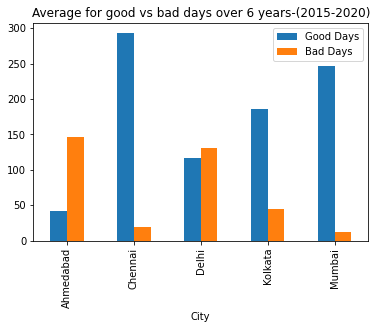

In [18]:
list_of_cities=['Ahmedabad','Delhi','Kolkata','Mumbai','Chennai']
metro_cities=city_df[city_df['City'].isin(list_of_cities)]

bad_aqi=['Severe','Very poor','Poor']
good_aqi=['Good','Satisfactory','Moderate']

bad_days=metro_cities[metro_cities['AQI_Bucket'].isin(bad_aqi)]
good_days=metro_cities[metro_cities['AQI_Bucket'].isin(good_aqi)]

cities_data=pd.DataFrame
gd_df=pd.DataFrame
bd_df=pd.DataFrame

bd_df=bad_days.groupby(['City','Year'])['Date'].count().to_frame('Bad Days')
gd_df=good_days.groupby(['City','Year'])['Date'].count().to_frame('Good Days')

cities_data=pd.merge(gd_df, bd_df, on=['City','Year'])


cities_data.groupby('City').mean().plot(legend=True,kind='bar',title='Average for good vs bad days over 6 years-(2015-2020)')
#print(df.head(5))



### Q4. Which particular month is most hazardous for each city from 2015-2020? 

In [19]:
city_list=city_df[city_df['AQI_Bucket']=='Severe']

city_list=city_list[city_list['City'].isin(list_of_cities)]

city_month=city_list.groupby(['City','Year','Month'])['Date'].count().to_frame('Severe Days')
city_month.reset_index(0,inplace=True)

India_city=city_month

city_month=city_month.sort_values(by=['City','Year','Severe Days'],ascending=(True,True,False))
city_month=city_month.reset_index()

year_list = ['2015','2016','2017','2018','2019','2020']


city_month=city_month.sort_index()
   
for city in list_of_cities:
    
    for yr in year_list:
            rec_city_year=city_month.loc[(city_month['City']==city)&(city_month['Year']==yr)]
            if not rec_city_year.empty:
                max_severe=rec_city_year['Severe Days'].max()
                data=city_month.loc[(city_month['City']==city)&(city_month['Year']==yr)&(city_month['Severe Days']==max_severe)]
                print('City- '+city+' - Year-'+yr+' Worst Month:-',data['Month'].values)
            else: 
                #print('No data for city: '+city+' in '+yr)
                pass



City- Ahmedabad - Year-2015 Worst Month:- ['02']
City- Ahmedabad - Year-2016 Worst Month:- ['07']
City- Ahmedabad - Year-2017 Worst Month:- ['11']
City- Ahmedabad - Year-2018 Worst Month:- ['08' '10' '11']
City- Ahmedabad - Year-2019 Worst Month:- ['08']
City- Ahmedabad - Year-2020 Worst Month:- ['02']
City- Delhi - Year-2015 Worst Month:- ['11']
City- Delhi - Year-2016 Worst Month:- ['01' '11']
City- Delhi - Year-2017 Worst Month:- ['05']
City- Delhi - Year-2018 Worst Month:- ['12']
City- Delhi - Year-2019 Worst Month:- ['01']
City- Delhi - Year-2020 Worst Month:- ['01']
City- Kolkata - Year-2018 Worst Month:- ['12']
City- Kolkata - Year-2019 Worst Month:- ['01']
City- Chennai - Year-2015 Worst Month:- ['03']
City- Chennai - Year-2016 Worst Month:- ['09']
City- Chennai - Year-2017 Worst Month:- ['10']


## Comparing Indian cities with a few other cities in the neighbourhood South-East Asia

##### The data - the data is sourced from webste:   https://aqicn.org/data-platform/covid19/
##### Since the file is of size 103 MB and all the data in the file is beyond the scope of this project, I have filtered and taken out the relevant data(cities - Dhaka & Colombo) in a smaller file: waqi_global_data.csv

In [20]:
global_data=pd.read_csv('waqi_global_data.csv')
global_data.shape
global_data.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,1/01/2020,BD,Dhaka,pm25,24,159,361,285,50527.40
1,2/01/2020,BD,Dhaka,pm25,24,122,348,164,60725.20
2,3/01/2020,BD,Dhaka,pm25,24,76,189,122,6290.36
3,4/01/2020,BD,Dhaka,pm25,24,82,190,144,10329.10
4,5/01/2020,BD,Dhaka,pm25,24,155,221,176,2255.65


In [21]:
#Add a column 'AQI_Bucket' to the data based on the median values of pm25
conditions = [(global_data['median']>240),
              (global_data['median']>180)&(global_data['median']<240),
              (global_data['median']>120)&(global_data['median']<180),
              (global_data['median']>65)&(global_data['median']<120),
              (global_data['median']>0)&(global_data['median']<65)
              ]
values=['Severe','Very Poor','Poor','Moderate','Fine']

#Place the days in range from severe to fine dependng on the PM25 score
global_data['AQI_Bucket']=np.select(conditions,values)

global_data[global_data['AQI_Bucket']=='Severe']['Date'].count()

#Print the data to see it it has been bucketed correctly
print(global_data[['Date','Specie','median','AQI_Bucket']].head(10))


         Date Specie  median AQI_Bucket
0   1/01/2020   pm25     285     Severe
1   2/01/2020   pm25     164       Poor
2   3/01/2020   pm25     122       Poor
3   4/01/2020   pm25     144       Poor
4   5/01/2020   pm25     176       Poor
5   6/01/2020   pm25     183  Very Poor
6   7/01/2020   pm25     234  Very Poor
7   8/01/2020   pm25     188  Very Poor
8   9/01/2020   pm25     231  Very Poor
9  10/01/2020   pm25     192  Very Poor


#### MERGING 2 DATAFRAMES

In [22]:
#Extract Year and Month from Date values
global_data['Date'] = global_data['Date'].astype(str)
global_data['Year']= global_data['Date'].str[-4:]
global_data['Month']= global_data['Date'].str[-7:-5]

all_data=global_data[['Date','Country','City','Year','Month','AQI_Bucket']]
#Set the Country column as static value IN
city_df['Country']='IN'
city_df.reset_index(0, inplace=True)
india_city=city_df[['Date','Country','City','Year','Month','AQI_Bucket']]

frames=[india_city,all_data]
global_data=pd.concat(frames)

### Q5. Monthwise comparison of Dhaka and Colombo with 2 other Indian cities e.g Delhi & Kolkata in the year 2020¶

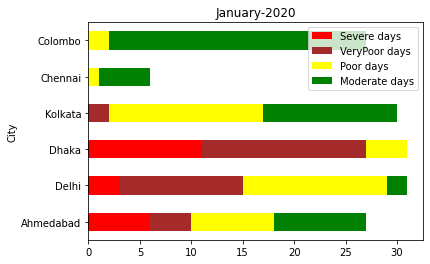

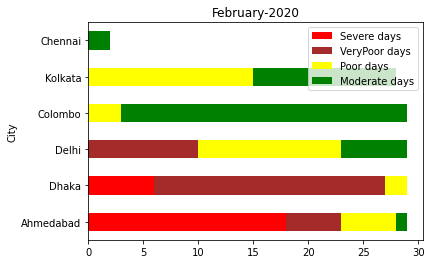

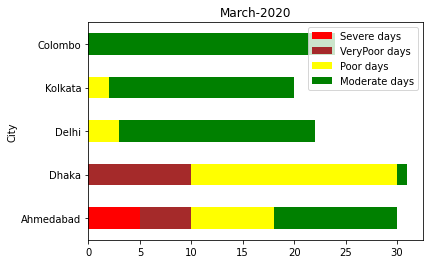

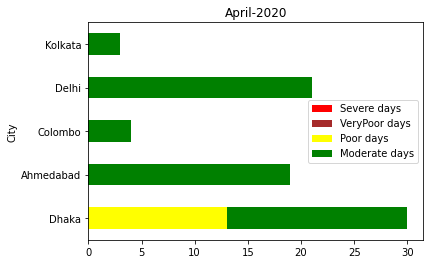

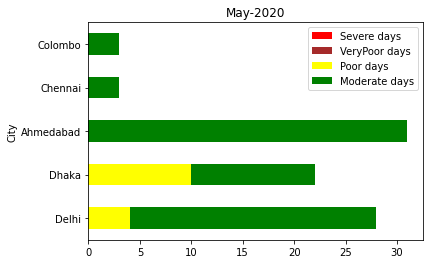

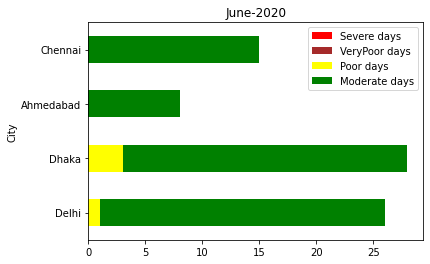

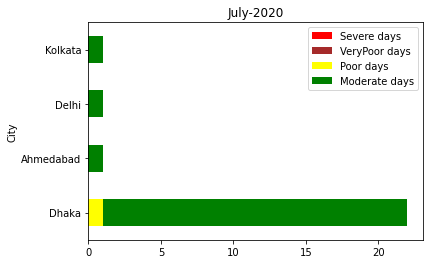

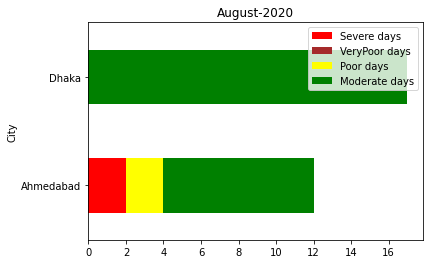

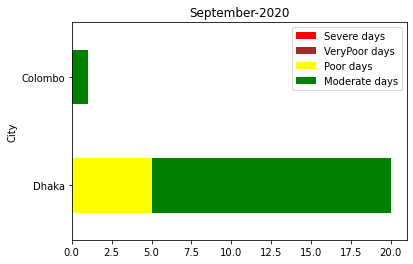

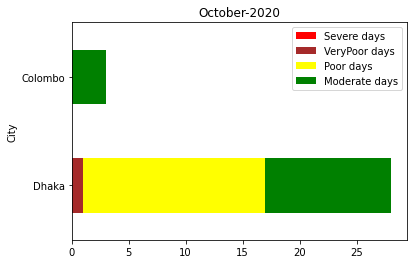

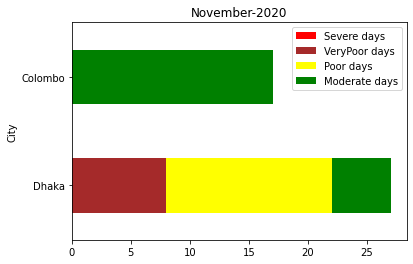

In [2466]:
#Extract the cities of interest from the whole dataset
cities=['Ahmedabad','Delhi','Kolkata','Chennai','Dhaka','Colombo']
aqi=['Severe','Very Poor','Poor','Moderate']

data_cities=global_data[(global_data['City'].isin(cities))&(global_data['AQI_Bucket'].isin(aqi))&(global_data['Year']=='2020')]

city_all_data=pd.DataFrame
city_severe=data_cities[data_cities['AQI_Bucket']=='Severe'].groupby(['City','Month'])['Date'].count().to_frame('Severe days')
city_vpoor=data_cities[data_cities['AQI_Bucket']=='Very Poor'].groupby(['City','Month'])['Date'].count().to_frame('VeryPoor days')
city_poor=data_cities[data_cities['AQI_Bucket']=='Poor'].groupby(['City','Month'])['Date'].count().to_frame('Poor days')
city_mod=data_cities[data_cities['AQI_Bucket']=='Moderate'].groupby(['City','Month'])['Date'].count().to_frame('Moderate days')


city_all_data=pd.merge(city_severe,city_vpoor,how='outer',on=['City','Month'])
city_all_data=pd.merge(city_all_data,city_poor,how='outer',on=['City','Month'])
city_all_data=pd.merge(city_all_data,city_mod,how='outer',on=['City','Month'])


city_all_data=city_all_data.fillna(0)
city_all_data.reset_index(0,inplace=True)
city_all_data.reset_index(0,inplace=True)


months={'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'}

#For 12 months plot 12 graphs
for key in months:
         mydf=city_all_data[city_all_data['Month']==key]
         
         if(mydf.empty==False):
                mydf.plot(title=months[key]+'-2020',kind='barh',stacked=True,x='City',y=['Severe days','VeryPoor days','Poor days','Moderate days'],color=['red','brown','yellow','green'])
                plt.savefig('Plot-'+key+'2020.png')
    
    



### Q6. What is the pollution level in Delhi during festivals- in November?

###### Data Source: webste: https://aqicn.org/data-platform/covid19/
###### File name: waqi-covid19-airqualitydata-2020.csv
###### As the total file is of size 53 MB, the data of interest is filtered into file Polldata_Nov_2020.csv

In [23]:
Nov_data=pd.read_csv('Polldata_Nov_2020.csv')
Nov_data.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,11/11/2020,IN,Hyderabad,co,120,0.2,11.7,4.7,65.71
1,12/11/2020,IN,Hyderabad,co,111,1.2,9.2,3.7,35.12
2,18/11/2020,IN,Hyderabad,co,118,0.1,10.5,3.6,48.60
3,23/11/2020,IN,Hyderabad,co,120,0.1,10.6,3.5,45.26
4,10/11/2020,IN,Hyderabad,co,120,1.6,14.3,4.8,56.30


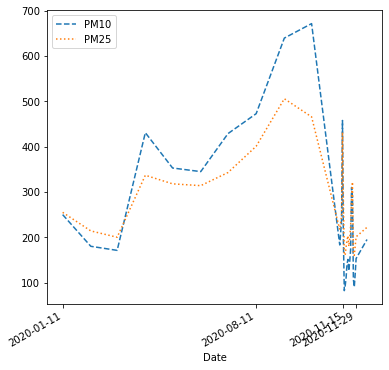

In [2468]:
#Extract the pollution data for Delhi

Nov_data['PM10']=Nov_data[Nov_data['Specie']=='pm10']['median']
Nov_data['O3']=Nov_data[Nov_data['Specie']=='o3']['median']
Nov_data['PM25']=Nov_data[Nov_data['Specie']=='pm25']['median']
Nov_data['NO2']=Nov_data[Nov_data['Specie']=='no2']['median']
Nov_data['CO']=Nov_data[Nov_data['Specie']=='co']['median']

Nov_data['Date']=pd.to_datetime(Nov_data.Date)
delhi_data=Nov_data[Nov_data['City']=='Delhi']

delhi_pm10=delhi_data[['Date','City','PM10']]
delhi_pm10=delhi_pm10.dropna(how='any',axis=0)

delhi_pm25=delhi_data[['Date','City','PM25']]
delhi_pm25=delhi_pm25.dropna(how='any',axis=0)



#delhi_pm10=delhi_data[['Date','City','PM10']]
#delhi_pm10=delhi_pm10.dropna(how='any',axis=0)

#delhi_pm25=delhi_data[['Date','City','PM25']]
#delhi_pm25=delhi_pm25.dropna(how='any',axis=0)

frames=[delhi_pm10,delhi_pm25]
delhi_poll_data=pd.merge(delhi_pm10,delhi_pm25)
#print(delhi_poll_data.to_string())

#delhi_data.sort_values(by=['Date'],inplace=True,ascending=True)
#print(delhi_data.head(5))

delhi_poll_data.plot(
    kind='line',
    style=['--',':'],
    x='Date',
    xticks=['01/11/2020','08/11/2020','15/11/2020','29/11/2020'],
#     #yticks=[100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525,550,575,600,625,650,675,700]
     yticks=[100,200,300,400,500,600,700]
)
    
plt.gcf().set_size_inches(6,6)

### Q7. What is the worst polluted Indian city in last 5 years?

        City Month  Year  Severe Days
0  Ahmedabad    02  2015           15
1  Ahmedabad    10  2015           14
2  Ahmedabad    03  2015           11
3  Ahmedabad    05  2015            5
4  Ahmedabad    04  2015            3


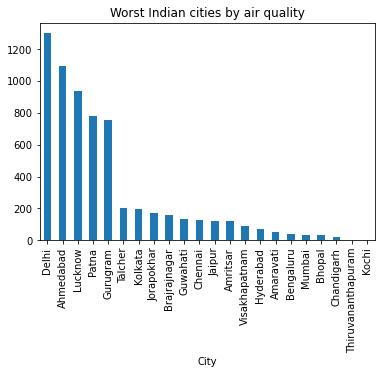

In [2469]:
print(city_month[['City','Month','Year','Severe Days']].head(5))
bad_aq=['Severe','Very Poor','Poor']
worst_cities=city_df[city_df['AQI_Bucket'].isin(bad_aq)]

wrst_city_by_yr=worst_cities.groupby(['City','Year'])['Date'].count().to_frame('Polluted days')
wrst_city_by_yr.reset_index(0,inplace=True)
wrst_city_by_yr=wrst_city_by_yr.groupby('City')['Polluted days'].sum().sort_values(ascending=False)
wrst_city_by_yr.plot(kind='bar',title='Worst Indian cities by air quality')

#city_df.groupby(['City','Month']).sum().sort_values(ascending=False)

### Q8. Compare the levels of different air-pollutants in the most polluted cities?

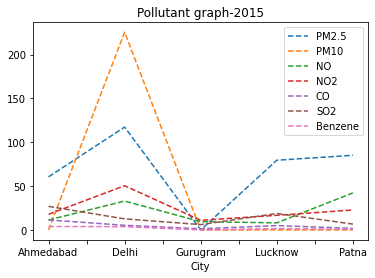

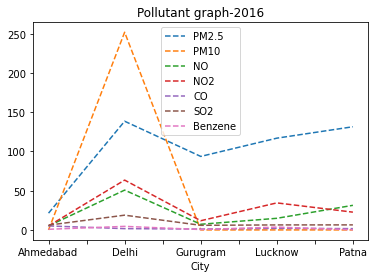

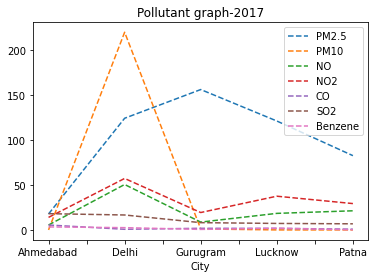

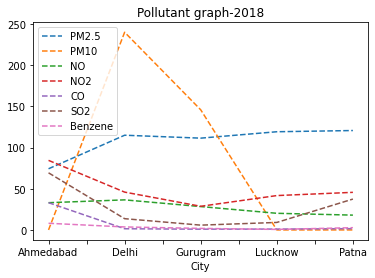

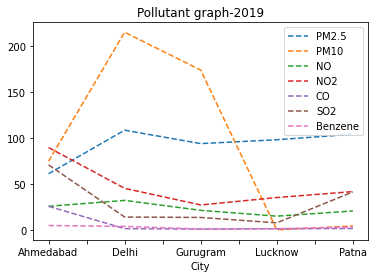

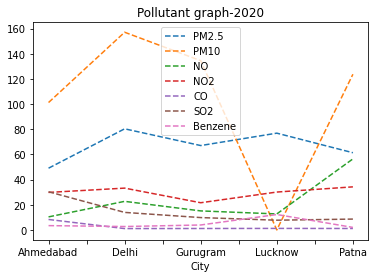

In [24]:
polcity_list=['Delhi','Ahmedabad','Lucknow','Patna','Gurugram']

polcity_df=city_df[['City','Year','PM2.5','PM10','NO','NO2','CO','SO2','Benzene']]
polcity_df=polcity_df[polcity_df['City'].isin(polcity_list)]
polcity_df.head(5)

years=['2015','2016','2017','2018','2019','2020']
#polcity_df_2015=polcity_df[polcity_df['Year']=='2015']
#polcity_df_2016=polcity_df[polcity_df['Year']=='2016']
#polcity_df_2017=polcity_df[polcity_df['Year']=='2017']

for yr in years:
    df=polcity_df[polcity_df['Year']==yr]
    df.groupby(['City']).mean().plot(title='Pollutant graph-'+yr,kind='line',style='--')

### Q9. What are the cleanest Indian cities in last 5 years?

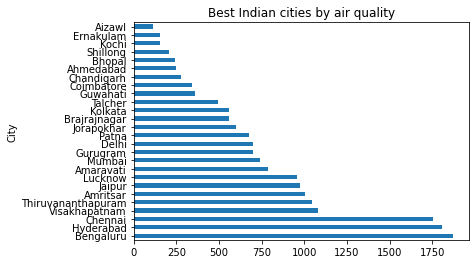

In [2470]:
good_aq=['Good','Moderate','Satisfactory']
best_cities=city_df[city_df['AQI_Bucket'].isin(good_aq)]

city_by_yr=best_cities.groupby(['City','Year'])['Date'].count().to_frame('Good days')
city_by_yr.reset_index(0,inplace=True)

city_by_yr=city_by_yr.groupby('City')['Good days'].sum().sort_values(ascending=False)


city_by_yr.plot(kind='barh',title='Best Indian cities by air quality')


### Q10. Compare the level of pollutants between 2 cleanest Indian cities Bengaluru & Hyderabad with the most polluted city of Delhi

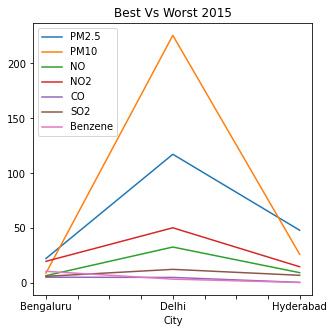

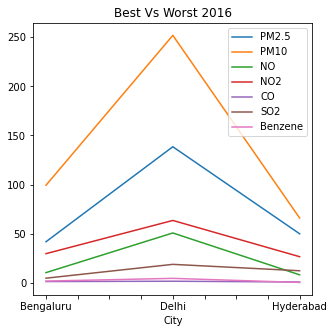

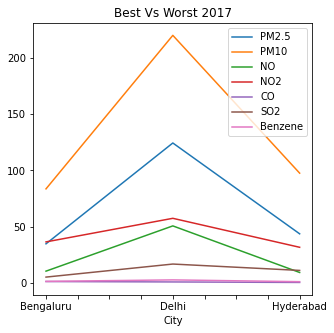

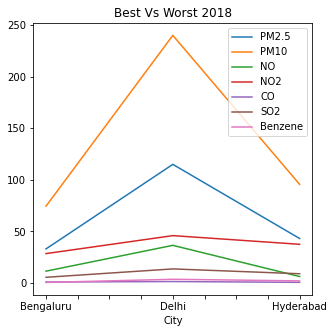

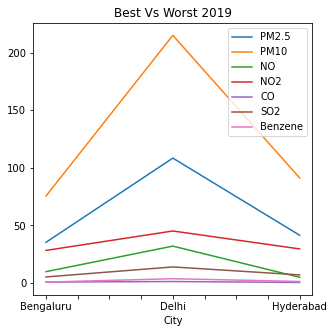

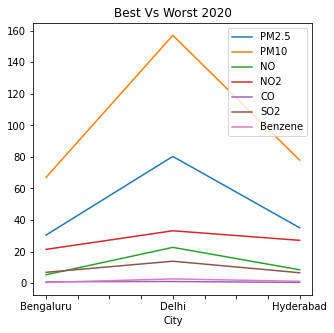

In [25]:
cty_list=['Bengaluru','Delhi','Hyderabad']
twocity_df=city_df[['City','Year','PM2.5','PM10','NO','NO2','CO','SO2','Benzene']]
twocity_df=twocity_df[twocity_df['City'].isin(cty_list)]

#twocity_df.head(5)
#print(twocity_df[twocity_df['City']=='Bengaluru'].groupby('Year').mean())
#print(twocity_df[twocity_df['City']=='Delhi'].groupby('Year').mean())

for yr in years:
    map_df=twocity_df[twocity_df['Year']==yr]
    map_df.groupby(['City']).mean().plot(title='Best Vs Worst '+yr,kind='line')
    plt.gcf().set_size_inches(5,5)
